<a href="https://colab.research.google.com/github/khurramjanjua5/deep-learning-projects/blob/main/cotton_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 99% 146M/148M [00:09<00:00, 15.8MB/s]
100% 148M/148M [00:09<00:00, 15.5MB/s]


In [5]:
import zipfile

# Path to the zip file
zip_file_path = '/content/cotton-disease-dataset.zip'

# Directory to extract the contents
extract_to_path = '/content/cotton-disease-dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [6]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline

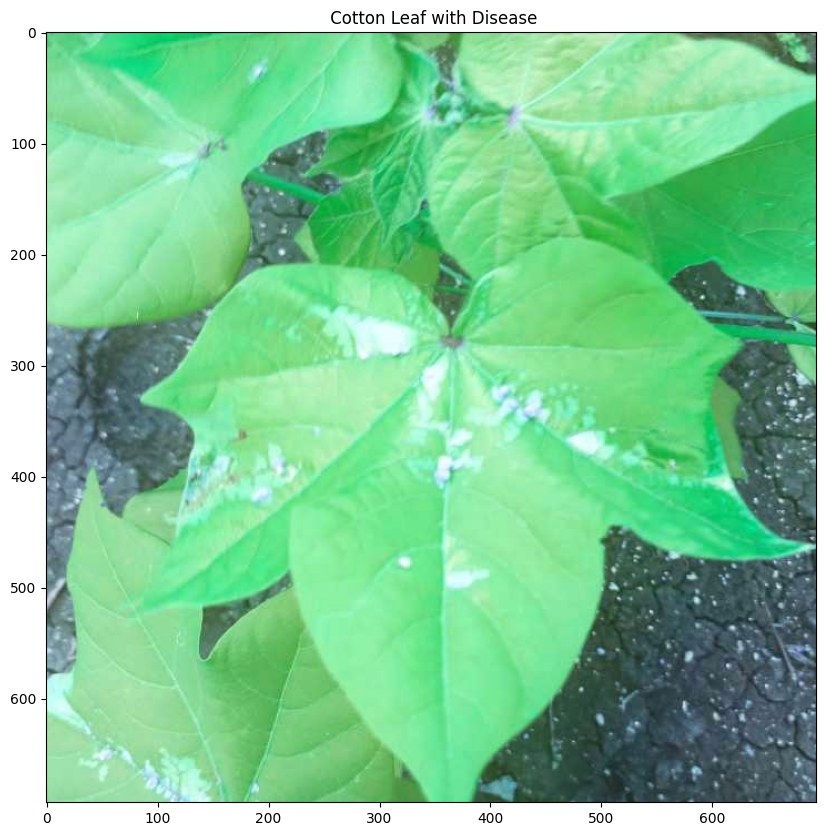

In [8]:
image = cv2.imread('/content/cotton-disease-dataset/Cotton Disease/train/diseased cotton leaf/dis_leaf (1)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title(' Cotton Leaf with Disease')
plt.imshow(image)

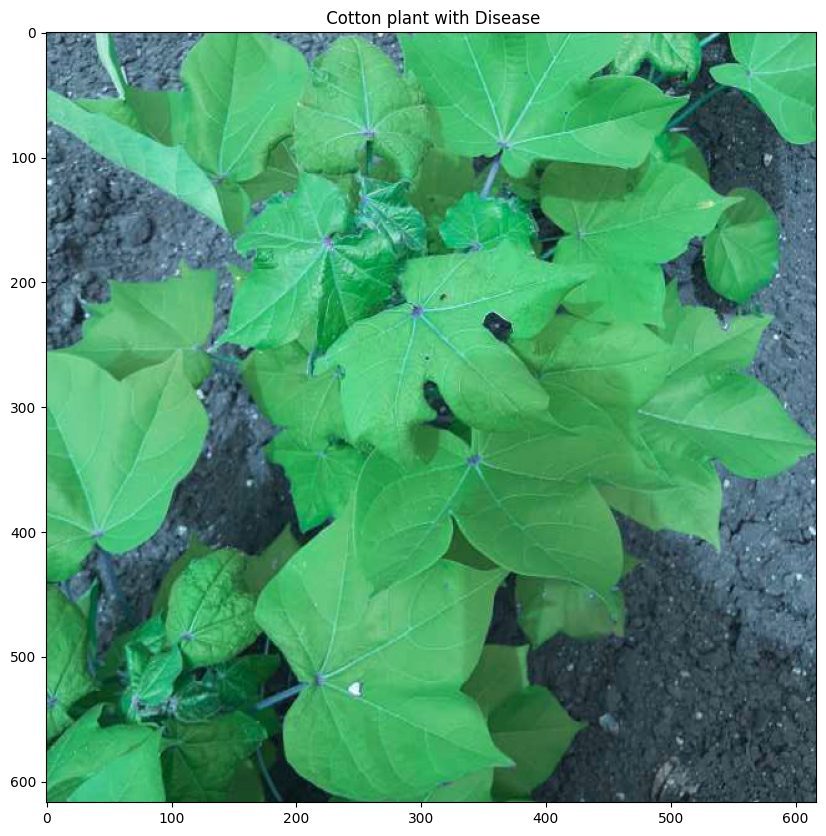

In [9]:
image = cv2.imread('/content/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (1)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title(' Cotton plant with Disease')
plt.imshow(image)

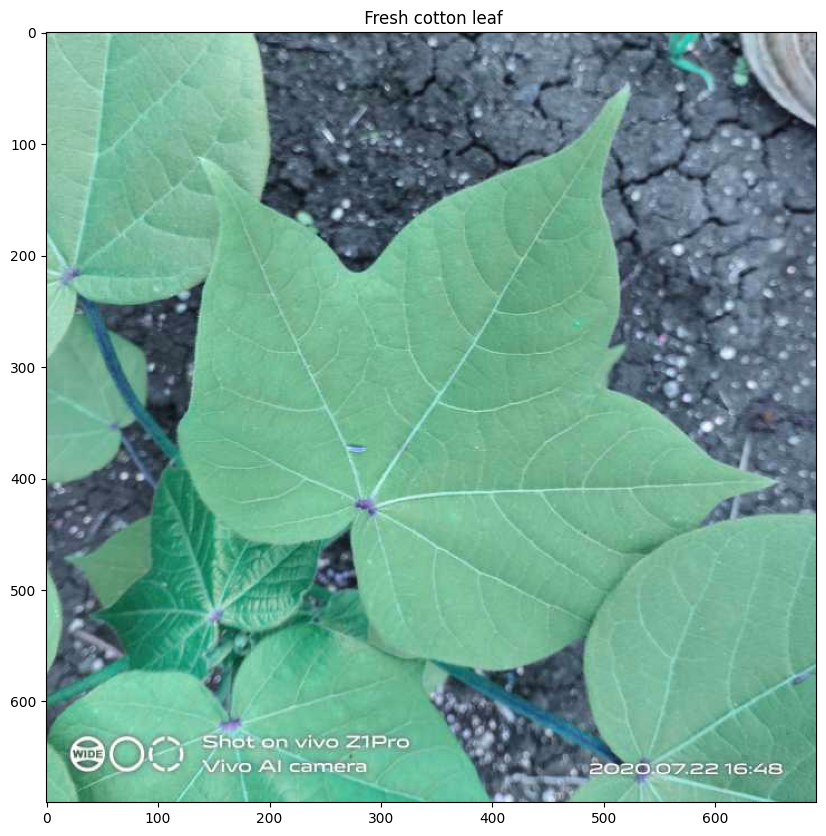

In [10]:
image = cv2.imread('/content/cotton-disease-dataset/Cotton Disease/train/fresh cotton leaf/d (1)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title(' Fresh cotton leaf')
plt.imshow(image)

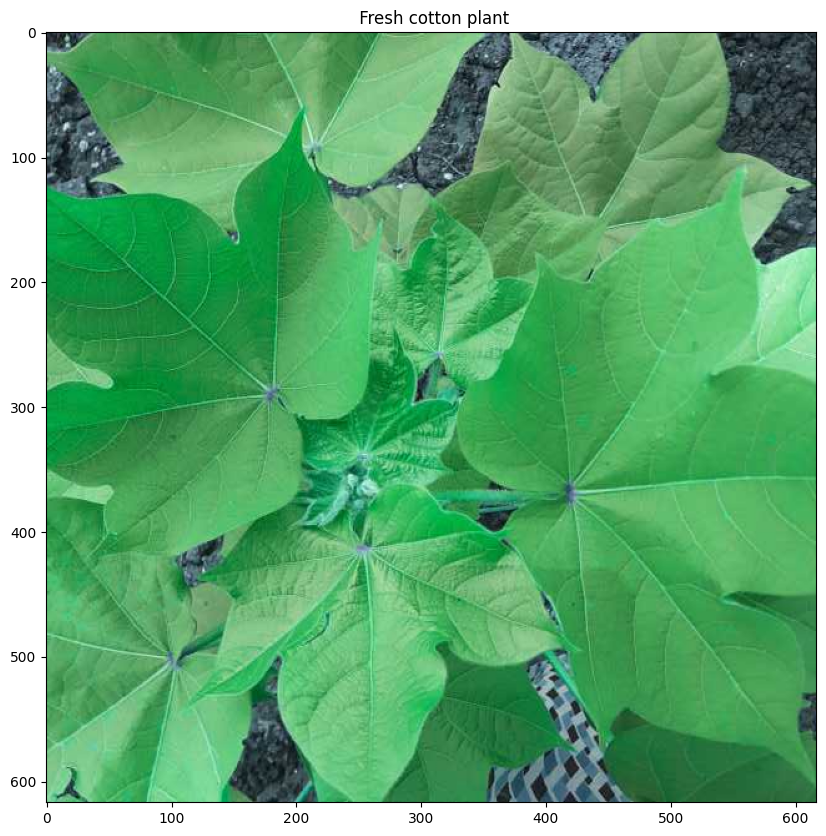

In [11]:
image = cv2.imread('/content/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (1)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title(' Fresh cotton plant')
plt.imshow(image)

In [12]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [14]:
train_data = train_datagenerator.flow_from_directory('/content/cotton-disease-dataset/Cotton Disease/train',
                                                    target_size = (256,256),
                                                    batch_size = 50,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('/content/cotton-disease-dataset/Cotton Disease/val',
                                                  target_size = (256,256),
                                                    batch_size = 50,
                                                    class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [35]:
# CNN Model
cnn = tf.keras.models.Sequential()
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))

# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))

#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [36]:
# Compiling the CNN
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

Epoch 1/10
61/61 [==============================] - 47s 696ms/step - loss: 1.2632 - accuracy: 0.4234 - val_loss: 1.1306 - val_accuracy: 0.5059
Epoch 2/10
61/61 [==============================] - 41s 677ms/step - loss: 1.0379 - accuracy: 0.5505 - val_loss: 0.9385 - val_accuracy: 0.5889
Epoch 3/10
61/61 [==============================] - 42s 686ms/step - loss: 0.9710 - accuracy: 0.5859 - val_loss: 1.0661 - val_accuracy: 0.5178
Epoch 4/10
61/61 [==============================] - 40s 663ms/step - loss: 0.9039 - accuracy: 0.6125 - val_loss: 0.8596 - val_accuracy: 0.6759
Epoch 5/10
61/61 [==============================] - 41s 670ms/step - loss: 0.8077 - accuracy: 0.6540 - val_loss: 0.7059 - val_accuracy: 0.7115
Epoch 6/10
61/61 [==============================] - 41s 665ms/step - loss: 0.7443 - accuracy: 0.6914 - val_loss: 0.8105 - val_accuracy: 0.6522
Epoch 7/10
61/61 [==============================] - 42s 684ms/step - loss: 0.7431 - accuracy: 0.6996 - val_loss: 0.6952 - val_accuracy: 0.6996

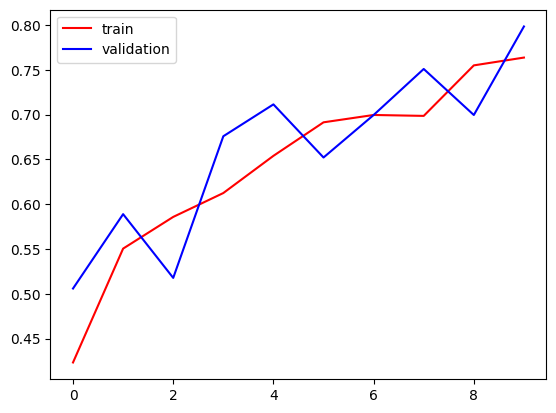

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

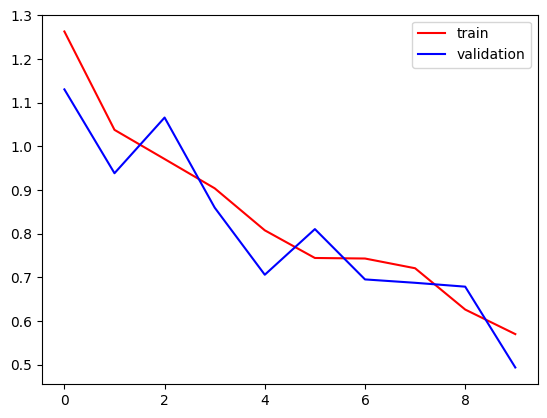

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()